C:\Users\User\AppData\Local\Temp\ipykernel_16528\1941559613.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=df, palette='Set2')


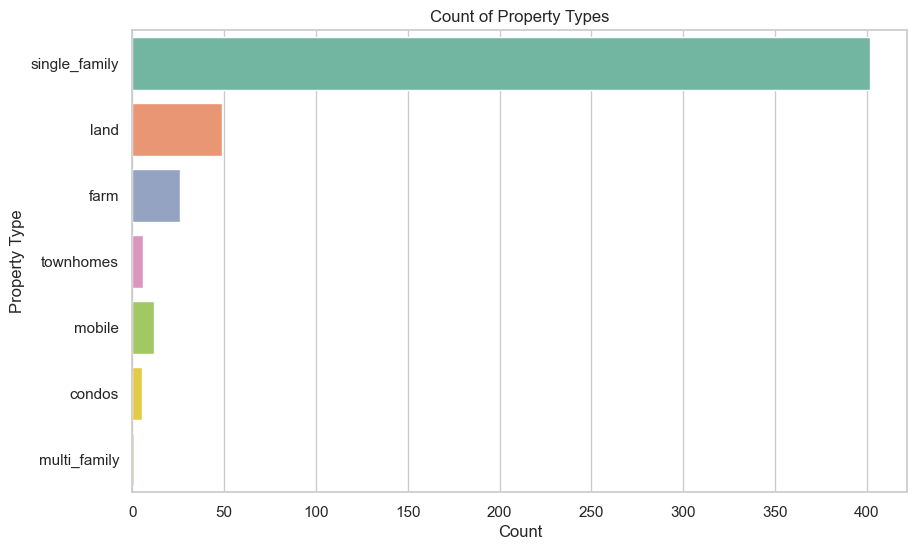

C:\Users\User\AppData\Local\Temp\ipykernel_16528\1941559613.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=df, palette='Set2', ax=axes[1,1])


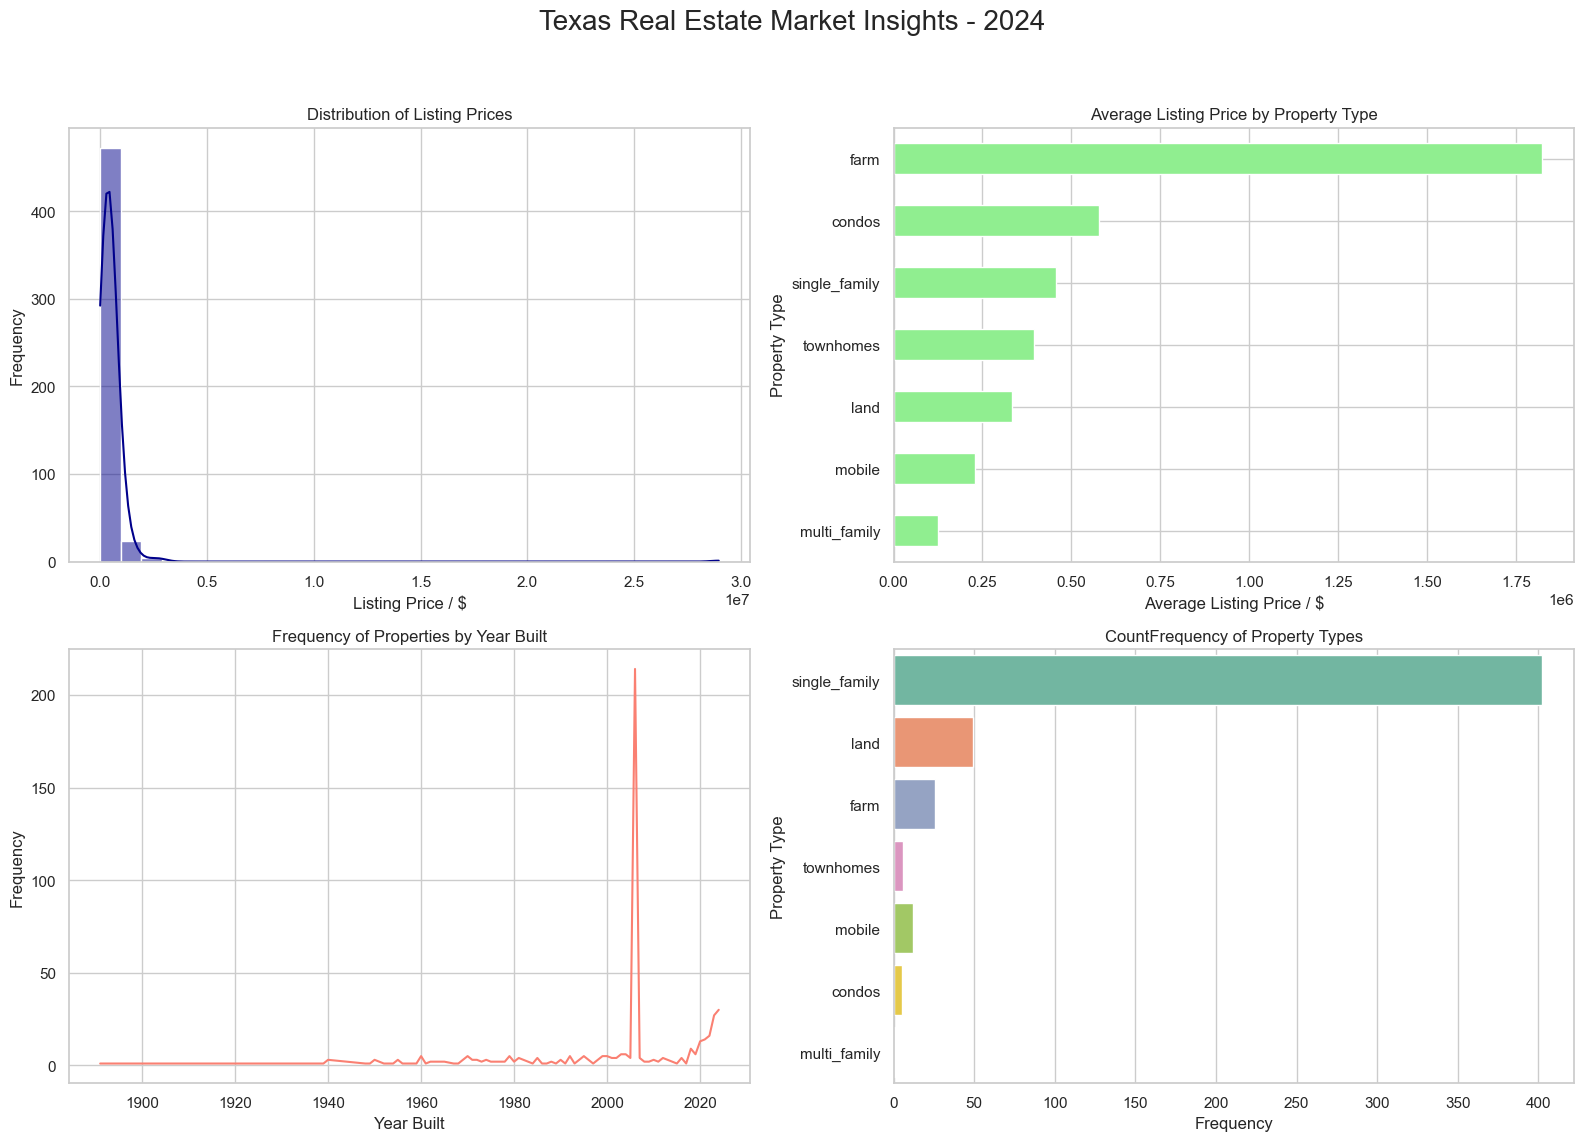

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('real_estate_texas_500_2024.csv')
df.columns = df.columns.str.lower()
df['listprice'] = df['listprice'].fillna(df['listprice'].mean())
df.drop(columns=['baths_full_calc'], axis=1, inplace=True)
df.drop(columns=['text'], axis=1, inplace=True)
df.drop(columns=['url'], axis=1, inplace=True)
df.drop(columns=['status'], axis=1, inplace=True)
df.drop(columns=['id'], axis=1, inplace=True)
df.drop(columns=['sub_type'], axis=1, inplace=True)
df['baths_full'] = df['baths_full'].fillna(df['baths_full'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())
df['sqft'] = df['sqft'].fillna(df['sqft'].median())
df['year_built'] = df['year_built'].fillna(df['year_built'].median())
df['stories'] = df['stories'].fillna(df['stories'].median())

# df.head()
# df.info()

# plt.figure(figsize=(10,6))
# sns.histplot(data=df, x=df['year_built'], bins=8, kde=True, color="green")
# plt.xlabel('Year')
# plt.ylabel('Frequency')
# plt.title('Frequency and Year_built relationship')
# plt.show()

# plt.figure(figsize=(10,6))
# sns.countplot(data=df, x='beds', color="green")
# plt.xlabel('Beds number')
# plt.ylabel('Frequency')
# plt.title('Frequency and bed numbers relationship')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.histplot(df['listprice'], bins=30, kde=True, color="green")
# plt.title('Distribution of Listing Prices')
# plt.xlabel('Listing Price / $')
# plt.ylabel('Frequency')
# plt.show()

# df.drop('type', axis=1, inplace=True)
# sns.heatmap(df.corr(), annot=True, cmap="Greens")

price_summary = df['listprice'].describe()
price_summary_df = pd.DataFrame(price_summary).transpose()
price_summary_df

plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df, palette='Set2')
plt.title('Count of Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Property Type', 'Count']
type_counts

yearly_summary = df.groupby('year_built').agg(
    average_listing_price=('listprice', 'mean'),
    average_square_footage=('sqft', 'mean')
).reset_index()
yearly_summary['average_listing_price'] = yearly_summary['average_listing_price'].round(2)
yearly_summary['average_square_footage'] = yearly_summary['average_square_footage'].round(2)
yearly_summary = yearly_summary.sort_values(by='year_built')
yearly_summary.head()

sns.set(style='whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Texas Real Estate Market Insights - 2024', fontsize=20)
sns.histplot(df['listprice'], bins=30, kde=True, color="darkblue", ax=axes[0,0])
axes[0,0].set_title('Distribution of Listing Prices')
axes[0,0].set_xlabel('Listing Price / $')
axes[0,0].set_ylabel('Frequency')

avg_price_by_type = df.groupby('type')['listprice'].mean().sort_values()
avg_price_by_type.plot(kind='barh', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Listing Price by Property Type')
axes[0, 1].set_xlabel('Average Listing Price / $')
axes[0, 1].set_ylabel('Property Type')

properties_by_year = df.groupby('year_built').size()
properties_by_year.plot(ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Frequency of Properties by Year Built')
axes[1, 0].set_xlabel('Year Built')
axes[1, 0].set_ylabel('Frequency')

sns.countplot(y='type', data=df, palette='Set2', ax=axes[1,1])
axes[1, 1].set_title('CountFrequency of Property Types')
axes[1, 1].set_xlabel('Frequency')
axes[1, 1].set_ylabel('Property Type')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('real_estate_texas_500_2024.csv')
df.columns = df.columns.str.lower()
df['listprice'] = df['listprice'].fillna(df['listprice'].mean())
df.drop(columns=['baths_full_calc'], axis=1, inplace=True)
df.drop(columns=['text'], axis=1, inplace=True)
df.drop(columns=['url'], axis=1, inplace=True)
df.drop(columns=['status'], axis=1, inplace=True)
df.drop(columns=['id'], axis=1, inplace=True)
df.drop(columns=['sub_type'], axis=1, inplace=True)
df['baths_full'] = df['baths_full'].fillna(df['baths_full'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())
df['sqft'] = df['sqft'].fillna(df['sqft'].median())
df['year_built'] = df['year_built'].fillna(df['year_built'].median())
df['stories'] = df['stories'].fillna(df['stories'].median())

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
# df.drop('type', axis=1, inplace=True)
X = df.drop(['listprice'], axis=1)
y = df['listprice']
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# build the models dictionary and put the r2 factor in it later
models = {}
def train_to_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    r2 = r2_score(y_test, y_predict)
    models[index] = r2

total_model = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor, RandomForestRegressor]
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'BayesianRidge', 'DecisionTreeRegressor', 'LinearSVR', 'KNeighborsRegressor', 'RandomForestRegressor']
index = 0
for regressor in total_model:
    train_to_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1
models

     baths  baths_full  beds    sqft  stories  type  year_built
0        2         2.0   3.0  1190.0      1.0     5      2018.0
1        4         3.0   4.0  2033.0      1.0     5      2002.0
2        2         2.0   4.0  2062.0      1.0     5      2012.0
3        4         3.0   5.0  3705.0      2.0     5      1985.0
4        2         2.0   3.0  3282.0      2.0     5      1981.0
..     ...         ...   ...     ...      ...   ...         ...
496      2         2.0   3.0  1810.0      1.0     5      2006.0
497      2         2.0   3.0  1438.0      1.0     5      1979.0
498      0         2.0   3.0  4000.0      2.0     1      2023.0
499      0         2.0   3.0  2034.5      1.0     2      2006.0
500      1         1.0   3.0  1352.0      1.0     5      1960.0

[501 rows x 7 columns]
0       240000.0
1       379900.0
2       370000.0
3       444000.0
4       569000.0
         ...    
496     357707.0
497     340000.0
498    2800000.0
499     112500.0
500     109000.0
Name: listprice, Leng

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LinearRegression': -0.2496324132158214,
 'Lasso': -0.24962430076117448,
 'Ridge': -0.24720665574109302,
 'BayesianRidge': -0.07049690707219725,
 'DecisionTreeRegressor': -1.7748800663910664,
 'LinearSVR': 0.1800423427842519,
 'KNeighborsRegressor': -2.7840049359206693,
 'RandomForestRegressor': -1.625329373023963}